<a href="https://colab.research.google.com/github/seismomat/TemasSelectos/blob/main/Optimizacion/QuadraticInterpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from time import sleep

In [2]:
x=np.linspace(-1,1,20)
f=lambda x:0.5-x*np.exp(-x**2)
y=f(x)

In [3]:
def Xm(a,b,c,f):
    num= f(a)*(c**2-b**2)+f(b)*(a**2-c**2)+f(c)*(b**2-a**2)
    den=f(a)*(c-b)+f(b)*(a-c)+f(c)*(b-a)
    xm=0.5*(num/den)
    return xm,f(xm)

In [4]:
def QuadraticInterpolation(a,c,f):
    TOL=1E-2; Iter=20;
    f_a=f(a);
    f_c=f(c);
    b=0.5*(a+c);
    f_b=f(b);
    n=0;
    while ((c-a)> TOL)and (n<Iter):
        sleep(1)
        n+=1
        clear_output(wait=True)
        plt.plot(x,y)
        plt.plot(a,0,marker="o",markersize=10,color="red",label="a")
        plt.plot(b,0,marker="o",markersize=10,color="purple",label="b")
        plt.plot(c,0,marker="o",markersize=10,color="yellow",label="c")
        plt.plot(a,f_a,marker="o",markersize=10,color="black",label="f(a)")
        plt.plot(b,f_b,marker="o",markersize=10,color="brown",label="f(b)")
        plt.plot(c,f_c,marker="o",markersize=10,color="green",label="f(c)")
        plt.legend()
        plt.show()
        xmin,f_xmin=Xm(a,b,c,f)
        
        if (a<xmin) and (xmin<b):
            if f_xmin<=f_b:
                c=np.copy(b);
                f_c=f(b);
                b=np.copy(xmin);
                f_b=np.copy(f_xmin);
            else:
                a=np.copy(xmin);
                f_a=np.copy(f_xmin);
        elif (b<xmin) and (xmin<c):
            if f_xmin<=f_b:
                a=np.copy(b);
                f_a=f(b);
                b=np.copy(xmin);
                f_b=np.copy(f_xmin);
            else:
                c=np.copy(xmin);
                f_c=np.copy(f_xmin);
            
    return xmin

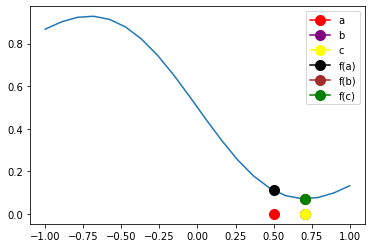

0.7071067922538671

In [5]:
QuadraticInterpolation(0,1,f)